In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file=open("/content/drive/MyDrive/mitofish.12S.Sep2021.tsv")


In [ ]:
df=pd.read_csv(file, sep='\t', header=0)

## Visualizing the DataFrame

In [ ]:
df.head()

,Accession,Gene definition,taxid,Superkingdom,Phylum,Class,Order,Family,Genus,Species,Sequence,OrderID,FamilyID
0,AB006953,Carassius auratus langsdorfi mitochondrial DNA...,138676,Eukaryota,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Carassius,Carassius langsdorfii,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,32.0,109
1,AB015962,"Mustelus manazo mitochondrial DNA, complete se...",79736,Eukaryota,Chordata,Chondrichthyes,Carcharhiniformes,Triakidae,Mustelus,Mustelus manazo,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,7.0,27
2,AB016274,"Sigmops gracilis mitochondrial genes, complete...",48457,Eukaryota,Chordata,Actinopteri,Stomiiformes,Gonostomatidae,Sigmops,Sigmops gracilis,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,42.0,200
3,AB018224,Coryphaenoides armatus mitochondrial gene for ...,76798,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides armatus,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243
4,AB018225,Coryphaenoides yaquinae mitochondrial gene for...,83387,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides yaquinae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243


# Some of the possible columns that can be used to classify the sequence are:
1. Species
2. Genus
3. Family

One of the important trait of a good Data Scientist is to check if there is enough number of samples that represent every class. Likewise, we should also check bias in the number of samples, where one class has huge number of samples while the other has few. 
<br>
Looking at the requirement, I have decided to select the column that has atleast 300 DNA samples that can be used to represent each class.

## Visualizing the data distribution of number of samples for each class
### Requirement
1. A class must represent atleast 300 DNA sample. Having a fair amount of samples for each class helps to reduce bias in the data and also increases classificaiton accuracy

### Visualizing number of sequence sample for each Genus
Looking at the plot, we can understand that there is fair amount of Genus that has more than 300 DNA samples representing each Genus

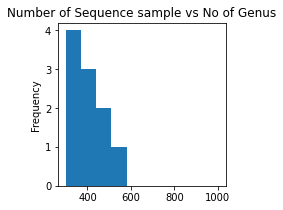

In [ ]:
df[['Genus']].value_counts().plot(kind='hist',figsize=(3,3),range=[300,1000], title="Number of Sequence sample vs No of Genus")

### Visualizing number of sequence sample for each Class
Looking at the plot, we can find that there are many family that has more than 300 sequence representing each family. 

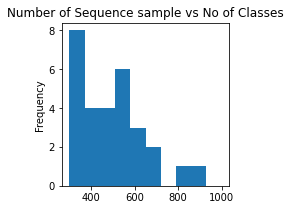

In [ ]:
df[['Family']].value_counts().plot(kind='hist',figsize=(3,3),range=[300,1000], title="Number of Sequence sample vs No of Classes")

### Visualizing number of sequence sample for each Species
Looking at the plot, we can find there are four species that has more than 300 DNA sequence sample. 

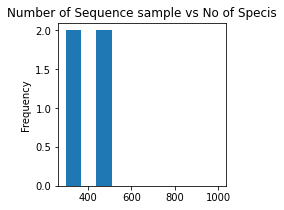

In [ ]:
df[['Species']].value_counts().plot(kind='hist',figsize=(3,3),range=[300,1000], title="Number of Sequence sample vs No of Specis")

## Looking at the above histograms, we can find both Genus and Family having good class to sequence ration. For this project, I am going to go with Family as our main class we are going to classfy based on the DNA sequence

## I am going to take top 15 family classes with highest number of sequence sample

In [ ]:
select_family=df['Family'].value_counts()[:15].index

In [ ]:
select_family=list(select_family)
print(select_family)

['Gobiidae', 'Clupeidae', 'Cyprinidae', 'Serranidae', 'Labridae', 'Salmonidae', 'Syngnathidae', 'Leuciscidae', 'Cottidae', 'Osphronemidae', 'Loricariidae', 'Cichlidae', 'Characidae', 'Blenniidae', 'Scombridae']


In [ ]:
new_df=df[(df['Family'].apply(lambda x: x in select_family))]

## Only selecting the sequence and Genus column from the dataset

In [ ]:
new_df=new_df[['Family','Sequence']]

In [ ]:
new_df.head()

,Family,Sequence
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...
30,Gobiidae,AGGGGCCCAAGTTGACAGACTCCGGCATAAAAAGTGGCTAATACAA...
31,Gobiidae,AGGGGCCCAAGTTGACAGACTCCGGCATAAAAAGTGGCTAATACAG...
32,Gobiidae,AGAGGCCCAAGTTGACAAACCTCGGCATAAAAAGTGGTTAATACAG...
33,Gobiidae,AGAGGCCCAAGTTGACAAATTTCGGCATAAAAAGTGATTAATATAT...


### Barplot showing nubmer of sequence for each Family Class

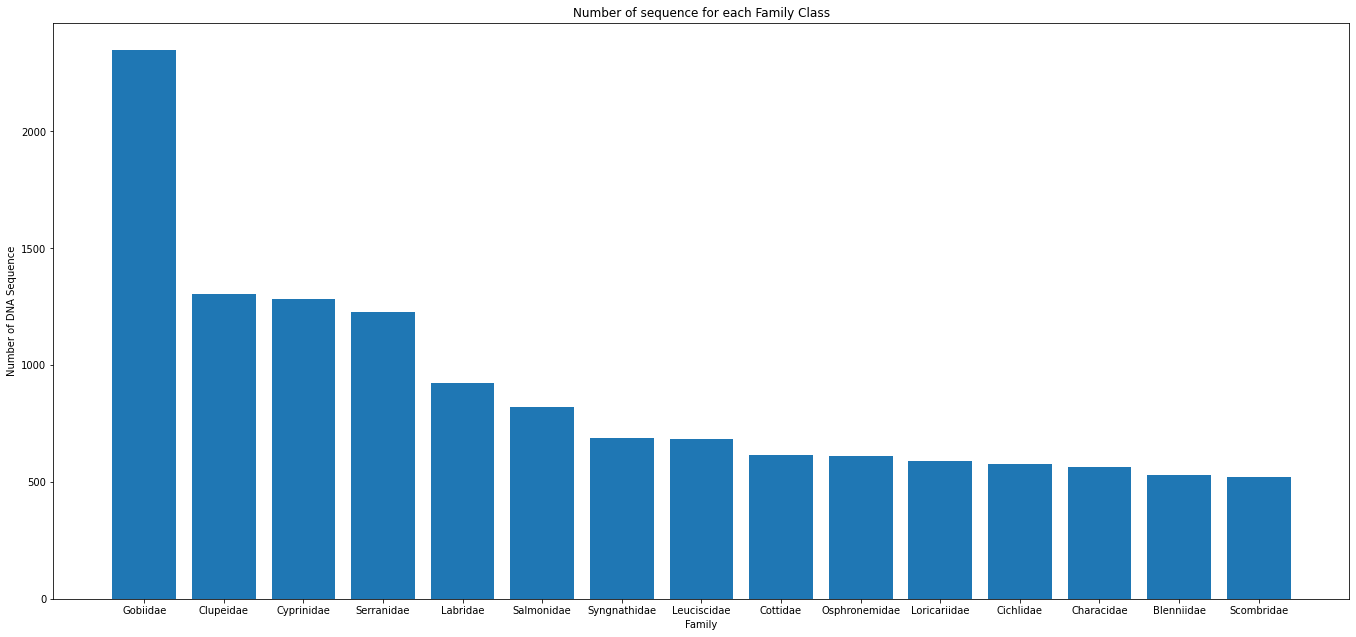

In [ ]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_axes([0,0,1,1])
Genus =new_df['Family'].value_counts().index
number_of_seq =new_df['Family'].value_counts().values
ax.bar(Genus,number_of_seq)
ax.set_ylabel('Number of DNA Sequence')
ax.set_xlabel("Family")
ax.set_title('Number of sequence for each Family Class')
plt.show()

## Adding the length of DNA sequence column to the Dataframe

In [ ]:
new_df['Sequence_length']= new_df['Sequence'].apply(lambda x: len(x))

In [ ]:
new_df.head()

,Family,Sequence,Sequence_length
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578
30,Gobiidae,AGGGGCCCAAGTTGACAGACTCCGGCATAAAAAGTGGCTAATACAA...,713
31,Gobiidae,AGGGGCCCAAGTTGACAGACTCCGGCATAAAAAGTGGCTAATACAG...,712
32,Gobiidae,AGAGGCCCAAGTTGACAAACCTCGGCATAAAAAGTGGTTAATACAG...,711
33,Gobiidae,AGAGGCCCAAGTTGACAAATTTCGGCATAAAAAGTGATTAATATAT...,712


In [ ]:
len(new_df)

13280

## Visualizing the distribution of the sequnce length 
Analizing the histogram, we can find the sequence length ranging from 104 to 17,227

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe25b5abc10>]],
      dtype=object)

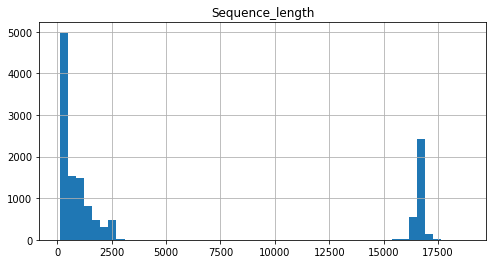

In [ ]:
new_df.hist(column="Sequence_length", figsize=(8,4), bins=50)

## Converting the sequence into a 3-merse sequence with the stride of 1. We will later count the total number of occurence of a unique 3merse sequence in a sequence sample.


In [ ]:
def getKmers(sequence, size=3):
    return [sequence[x:x+size] for x in range(len(sequence) - size + 1)]

In [ ]:
new_df['words'] = new_df.apply(lambda x: getKmers(x['Sequence']), axis=1)

In [ ]:
new_df['sentence']=new_df['words'].apply(lambda x: ' '.join(x))

#converting the 3-merse sequence to a matrix of token counts

In [ ]:
corpus=list(new_df['sentence'])
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)

## Visualizing all our feature array
The length of our feature array is 271

In [ ]:
features=vectorizer.get_feature_names()
print(features)


['aaa', 'aac', 'aag', 'aak', 'aam', 'aan', 'aar', 'aas', 'aat', 'aaw', 'aay', 'aca', 'acb', 'acc', 'acg', 'ack', 'acm', 'acn', 'acr', 'acs', 'act', 'acw', 'acy', 'aga', 'agc', 'agd', 'agg', 'agh', 'agk', 'agm', 'agn', 'agr', 'ags', 'agt', 'agw', 'agy', 'aka', 'akc', 'akt', 'ama', 'amc', 'amg', 'amm', 'amt', 'ana', 'anc', 'ang', 'ann', 'anr', 'ant', 'any', 'ara', 'arc', 'arg', 'arm', 'arr', 'art', 'ary', 'asa', 'asc', 'asg', 'ast', 'asy', 'ata', 'atb', 'atc', 'atg', 'atk', 'atm', 'atn', 'atr', 'att', 'atw', 'aty', 'awa', 'awc', 'awg', 'awk', 'awt', 'aww', 'awy', 'aya', 'ayc', 'ayg', 'ayk', 'ayr', 'ayt', 'ayy', 'bga', 'bta', 'caa', 'cac', 'cag', 'cak', 'cam', 'can', 'car', 'cas', 'cat', 'caw', 'cay', 'cbt', 'cca', 'ccc', 'ccg', 'cck', 'ccm', 'ccn', 'ccr', 'ccs', 'cct', 'ccv', 'ccw', 'ccy', 'cga', 'cgc', 'cgg', 'cgk', 'cgm', 'cgn', 'cgr', 'cgs', 'cgt', 'cgw', 'cgy', 'ckc', 'ckg', 'ckk', 'ckt', 'cma', 'cmc', 'cmg', 'cmm', 'cmt', 'cna', 'cnc', 'cng', 'cnn', 'cnt', 'cra', 'crc', 'crg', 'crr'

In [ ]:
len(features)

576

# Mapping all our feature with the feature array
###This technique invloves counting the number of times the feature was detected in our sequence data

In [ ]:
X=X.toarray()

## Visualizing a simple feature map for the first sequence


In [ ]:
print(X[0])

[487 434 271   0   0   0   0   0 436   0   0 413   0 392 136   0   0   0
   0   0 374   0   0 220 304   0 228   0   0   0   0   0   0 201   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 353   0 291 219   0   0   0   0 452
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 441 351 217   0   0   0   0   0 314   0   0   0 399 433 160   0   0   0
   0   0 415   0   0   0 132 120  98   0   0   0   0   0  83   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 450 254   0 198   0   0   0   0   0
 315   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 283
 201 179   0   0   0   0   0 175   0   0 226 273  48   0   0   0   0   0
 176   0   0   0 227 136 114   0   0   0   0   0 110   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 200  94  91   0   0   0   

In [ ]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(list(new_df['Family']))


## Splitting the Data in to Training and Testing Dataset

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, random_state=42)

## Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(C=0.01 ,random_state = 0)
LogReg_clf.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [ ]:
y_pred = LogReg_clf.predict(X_test)

In [ ]:
print("Accuracy on test set for Logistic Regression is: ", np.mean(y_pred==y_test))

Accuracy on test set for Logistic Regression is:  0.7225150602409639


# Using Support vector machine

In [ ]:
from sklearn.svm import LinearSVC, SVC
clf=SVC(C=0.01, kernel='linear')

In [ ]:
clf.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [ ]:
svm_pred=clf.predict(X_test)

In [ ]:
print("Accuracy on test set: ", np.mean(svm_pred==y_test))

Accuracy on test set:  0.9213102409638554


## Using Self-Organizing Map to group data based on common similarities

In [ ]:
#! pip install minisom

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Plotting our SOM
from pylab import bone,pcolor,colorbar,plot,show
from minisom import MiniSom
import matplotlib.pyplot as plt


In [ ]:
# Scaling the data in the range of 0 and 1
sc=MinMaxScaler(feature_range=(0,1))
scaled_x=sc.fit_transform(X)

## Setting the training parameters

In [ ]:
# input_length is going to be number of column
# learning rate= 0.5 which is deafult
#sigma= 1 which is deafult 
som=MiniSom(x=5, y=5, input_len=576, sigma=1.0, learning_rate=0.5)

#initialising our weight
som.random_weights_init(scaled_x)

#number of interation to train our som
som.train_random(data=scaled_x,num_iteration=100)

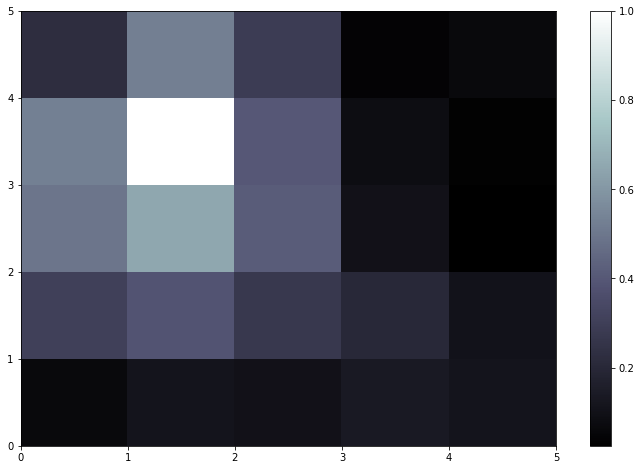

In [ ]:
plt.figure(figsize=(12,8))
bone()
pcolor(som.distance_map().T)
colorbar()
show()

In [ ]:
mappings=som.win_map(scaled_x)

In [ ]:
def plot_sequence_in_index(x,y):
  mapper_index=mappings[(x,y)]
  inv_mapper_index=sc.inverse_transform(mapper_index)
  index=[]
  family_names=[]
  for i in inv_mapper_index:
      ind=int(round(i[0]))
      index.append(ind)
  for i in index:
      family_names.append(new_df['Family'].iloc[i])
  family_names=pd.Series(family_names)
  fig = plt.figure(figsize=(8,5))
  ax = fig.add_axes([0,0,1,1])
  Genus =family_names.value_counts().index
  number_of_seq =family_names.value_counts().values
  ax.bar(Genus,number_of_seq)
  ax.set_ylabel('Number of DNA Sequence in the Cluster')
  ax.set_xlabel("Family")
  ax.set_title('Families that are grouped in the Cluster')
  plt.show()

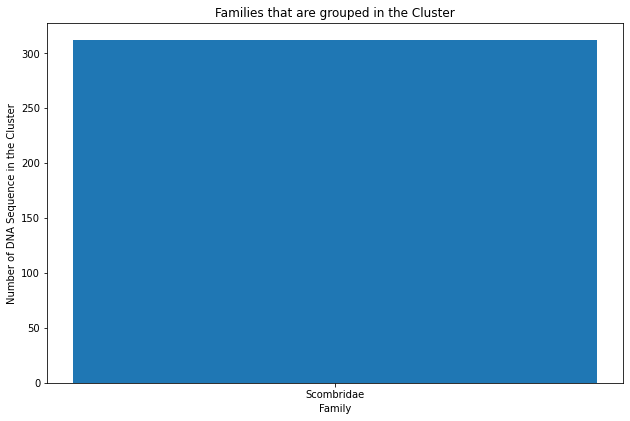

In [ ]:
plot_sequence_in_index(3,4)

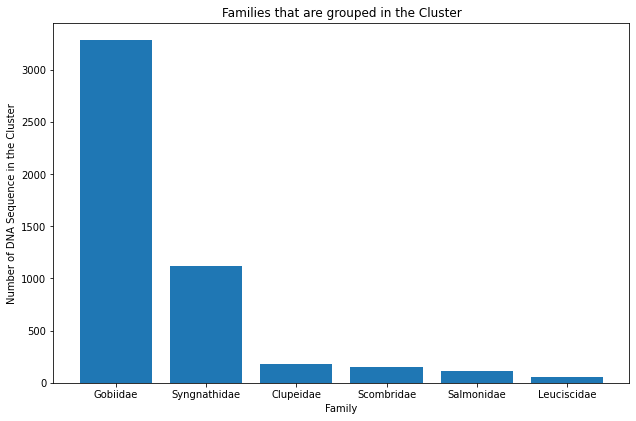

In [ ]:
plot_sequence_in_index(0,0)

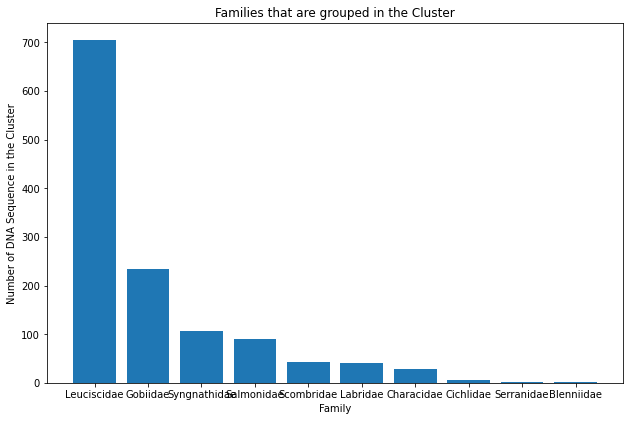

In [ ]:
plot_sequence_in_index(1,3)